In [238]:
import numpy as np
import matplotlib.pyplot as plt


In [239]:
calibration_fmt = 'data/Male Subject 15/IMU calibration/elbow flexion 1/{}'
forearm_sensor = calibration_fmt.format('forearm.csv')
forearm_data = np.loadtxt(forearm_sensor, delimiter=',')

In [240]:
def normalise_to_range(signal, top, bottom):
    signal-= signal.min()
    signal/= signal.max()
    signal *= (top - bottom)
    signal += bottom

    return signal


In [241]:
def linear_sum(acceleration):
    output = np.zeros(len(acceleration))
    for i in range(1, len(acceleration)):
        output[i] = np.sum(acceleration[:i])
    return output

In [242]:
def get_angles_from_data(sensor_data, top, bottom):
    acceleration = sensor_data.T[0]

    sos = butter(4, 1, 'low', fs = 100, output='sos')
    sos_l = butter(4, 0.2, 'high', fs = 100, output='sos')
    filtered = sosfilt(sos, acceleration)

    plt.plot(filtered)

    summed = linear_sum(filtered)
    plt.figure()
    plt.plot(summed)

    return normalise_to_range(sosfilt(sos_l, summed), top, bottom)


In [243]:
len(forearm_data)

1001

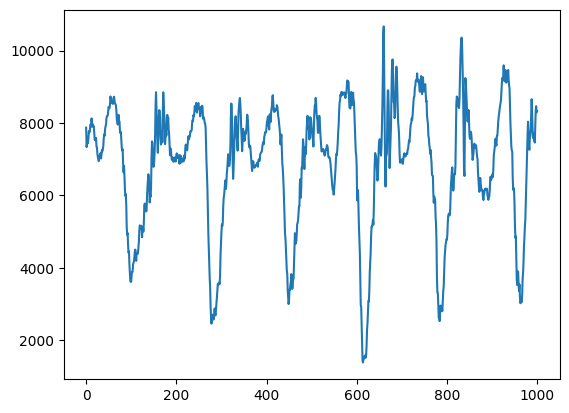

In [244]:
plt.plot(forearm_data.T[0])

In [245]:
accl = forearm_data.T[0]
accl -= accl.mean()

In [246]:
plt.plot(accl)

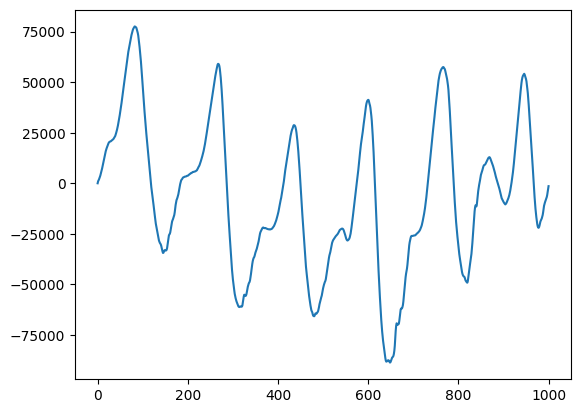

In [247]:
plt.plot(linear_sum(accl))

In [248]:
from scipy.signal import butter, sosfilt

In [249]:
filt = butter(2, 0.2,  'hp', fs = 100, output='sos' )

filtered = sosfilt(filt, linear_sum(accl))

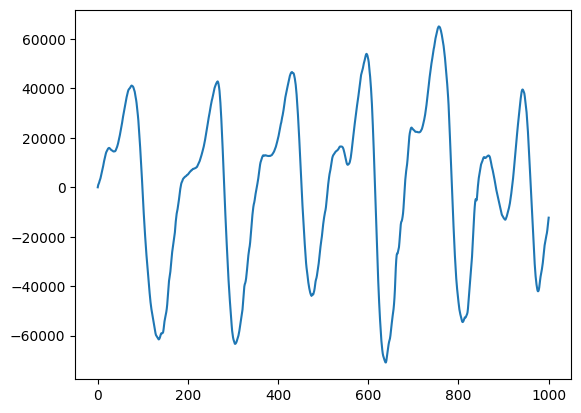

In [250]:
plt.plot(filtered)

In [251]:
plt.plot(normalise_to_range(filtered, 135, 45))

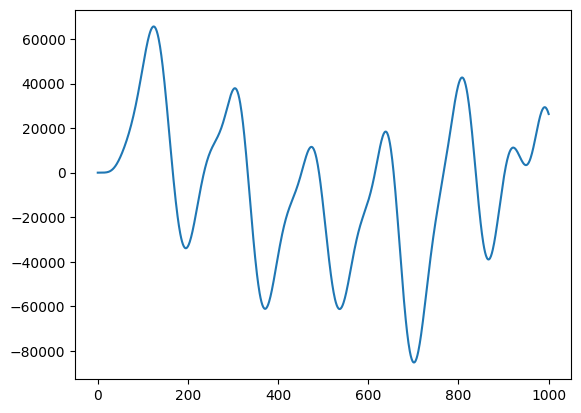

In [252]:
out = get_angles_from_data(forearm_data, 135, 45)

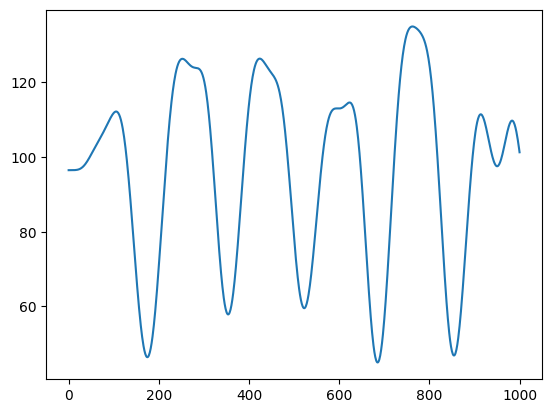

In [253]:
plt.plot(out)

In [254]:
angles = np.zeros((len(forearm_data), 2))

In [255]:
import os
os.makedirs("data/Male Subject 15/Vicon_Calibration/", exist_ok = True)

In [256]:
np.savetxt("data/Male Subject 15/Vicon_Calibration/elbow_flexion_1.csv", angles, delimiter=',')